# Matching

## Problem Description

In the context of managing employees within a company, a critical decision faced by managers is selecting pairs of employees, known as "binoms." This selection process involves considering the working compatibility between employees, which is represented in a graph denoted as G, with each employee being a distinct node in the graph. The presence of an edge between two nodes, such as A and B, signifies their potential to work together effectively. The primary objective for the manager is to create as many binoms as possible.

## Step 0: Imports

Imports of the libraries

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import time

## Step 1: Maximun Degree Heuristic


In [22]:
def maximum_degree_matching(graph):
    matching_graph = graph.copy()
    matching = []

    while matching_graph:
        max_degree_node = max(matching_graph, key=matching_graph.degree)
        neighbors = list(matching_graph.neighbors(max_degree_node))
        if neighbors:
            neighbor = neighbors[0]
            matching.append((max_degree_node, neighbor))
            matching_graph.remove_node(max_degree_node)
            matching_graph.remove_node(neighbor)
        else:
            break
    return matching

**Maximum Degree Heuristic:**

The Maximum Degree Heuristic aims to find a maximum-size matching in a graph by selecting nodes based on their degree, which is the number of edges connected to a node. The process can be broken down as follows:

1. In each iteration, the algorithm selects the node with the maximum degree. This selection operation has a time complexity of $O(n)$, where "n" represents the number of nodes in the graph.

2. Once the node with the maximum degree is chosen, the algorithm checks the neighbors of this node. In the worst case, a node may have at most "n" neighbors, meaning there could be up to "n" iterations of neighbor checks. The operation of checking neighbors and selecting one neighbor is an $O(n)$ operation.

3. The algorithm repeats this process until no more nodes can be added to the matching. The worst-case scenario occurs when all nodes are included in the matching. The time complexity is $O(n)$ for each node selection and $O(n)$ for neighbor checks, resulting in a time complexity of $O(n^2)$ for the entire process.

Mathematically, the worst-case time complexity for the Maximum Degree Heuristic is $O(n^2)$

## Step 2: Maximum Weight Heuristic

In [23]:
def maximum_weight_matching(graph):
    matching_graph = graph.copy()
    matching = []

    edges = sorted(graph.edges(data=True), key=lambda x: -x[2].get('weight', 1))

    for edge in edges:
        u, v, data = edge
        if matching_graph.has_edge(u, v):
            matching.append((u, v))
            matching_graph.remove_node(u)
            matching_graph.remove_node(v)
    return matching

**Maximum Weight Heuristic:**

The Maximum Weight Heuristic is designed to find a maximum-size matching in a graph by prioritizing edges based on their weight, which represents the suitability of pairing the connected nodes. The process can be broken down as follows:

1. In each iteration, the algorithm begins by sorting the edges in the graph by their weight. This sorting operation takes $O(m \log m)$ time, where "m" represents the number of edges in the graph.

2. After the edges are sorted, the algorithm checks if the selected edge can be added to the matching. This check essentially involves verifying whether the nodes connected by the edge are still available in the graph. This operation is typically constant time and is denoted as $O(1)$.

3. The algorithm repeats this process until no more edges can be added to the matching. In the worst case, all edges need to be checked, but the sorting operation dominates the time complexity.

The time complexity of the Maximum Weight Heuristic is mainly determined by the sorting operation, which is $O(m \log m)$. This means that the time required by the algorithm to find a matching is proportional to the logarithm of the number of edges in the graph.

## Step 3: Compare Algorithms


For theses tests, we use Erdös-Rendy random graph with 120 nodes and 0.04 probability of edge creation. We run the matching 1000 time to avoid randomness

In [24]:
def get_matching_and_time(iterations, matching_func):
    matching_times = []
    mean_matching_size = []
    mean_matching_sizes = []

    for _ in range(iterations):
        graph = nx.generators.random_graphs.erdos_renyi_graph(120, 0.04)

        start_time = time.time()
        matching = matching_func(graph.copy())
        end_time = time.time()
        matching_times.append(end_time - start_time)

        mean_matching_size.append(len(matching))
        mean_matching_sizes.append(sum(mean_matching_size)/len(mean_matching_size))

    return matching_times, mean_matching_sizes

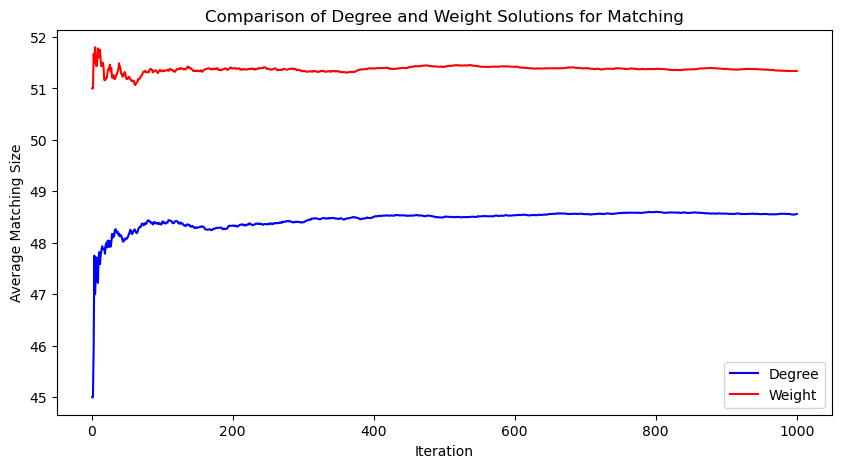

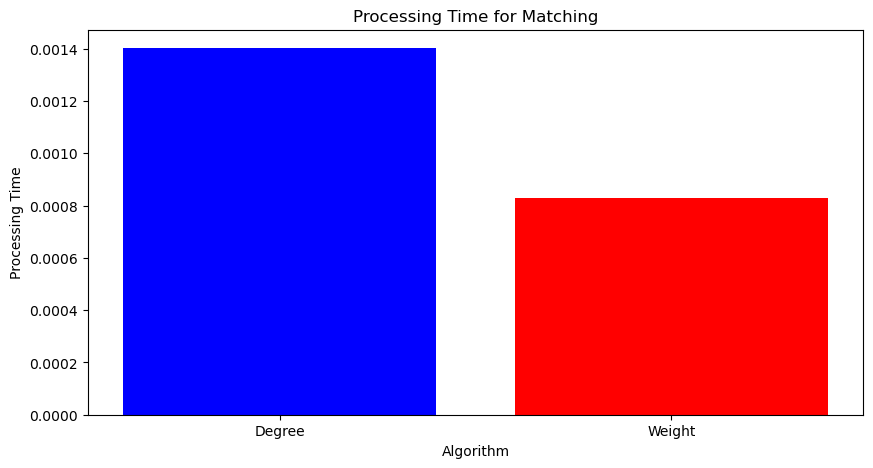

Average Degree Matching size for 1 iteration: 48.561
Average Weight Matching size for 1 iteration: 51.34

Average Degree Processing Time for 1 iteration: 0.0014029331207275392
Average Weight Processing Time for 1 iteration: 0.0008289186954498291


In [25]:
def compare_algorithms(iterations=100):

    degree_times, degree_mean_sizes = get_matching_and_time(iterations, maximum_degree_matching)
    weight_times, weight_mean_sizes = get_matching_and_time(iterations, maximum_weight_matching)

    x = range(1, len(degree_mean_sizes) + 1)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, degree_mean_sizes, label='Degree', color='blue')
    ax.plot(x, weight_mean_sizes, label='Weight', color='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Average Matching Size')
    ax.legend()
    plt.title('Comparison of Degree and Weight Solutions for Matching')
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(['Degree', 'Weight'], [sum(degree_times) / iterations, sum(weight_times) / iterations], color=['blue', 'red'])
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Processing Time')
    plt.title('Processing Time for Matching')
    plt.show()

    print(f'Average Degree Matching size for 1 iteration: {degree_mean_sizes[-1]}')
    print(f'Average Weight Matching size for 1 iteration: {weight_mean_sizes[-1]}', end='\n\n')

    print(f'Average Degree Processing Time for 1 iteration: {sum(degree_times) / iterations}')
    print(f'Average Weight Processing Time for 1 iteration: {sum(weight_times) / iterations}')

compare_algorithms(1000)